In [1]:
library(devtools)
install_github("saezlab/CNORode")

Loading required package: usethis




highr        (0.9    -> 0.10     ) [CRAN]
digest       (0.6.30 -> 0.6.31   ) [CRAN]
stringr      (1.4.1  -> 1.5.0    ) [CRAN]
jsonlite     (1.8.3  -> 1.8.4    ) [CRAN]
bslib        (0.4.1  -> 0.4.2    ) [CRAN]
isoband      (0.2.6  -> 0.2.7    ) [CRAN]
BiocGenerics (NA     -> 0.44.0   ) [CRAN]
graph        (NA     -> 1.76.0   ) [CRAN]
bitops       (NA     -> 1.0-7    ) [CRAN]
BH           (NA     -> 1.81.0-1 ) [CRAN]
igraph       (NA     -> 1.4.0    ) [CRAN]
XML          (NA     -> 3.99-0.13) [CRAN]
Rgraphviz    (NA     -> 2.42.0   ) [CRAN]
RCurl        (NA     -> 1.98-1.10) [CRAN]
RBGL         (NA     -> 1.74.0   ) [CRAN]
genalg       (NA     -> 0.2.1    ) [CRAN]
CellNOptR    (NA     -> 1.44.0   ) [CRAN]


Installing 17 packages: highr, digest, stringr, jsonlite, bslib, isoband, BiocGenerics, graph, bitops, BH, igraph, XML, Rgraphviz, RCurl, RBGL, genalg, CellNOptR

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpr5zbf5/remotes90fe7268c/saezlab-CNORode-1997d85/DESCRIPTION’ ... OK
* preparing ‘CNORode’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘CNORode_1.37.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("BiocManager")
BiocManager::install("MEIGOR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'BiocVersion', 'MEIGOR'

also installing the dependencies ‘truncnorm’, ‘snow’, ‘Rsolnp’, ‘snowfall’, ‘deSolve’


Old packages: 'CNORode', 'bit', 'bslib', 'data.table', 'devtools', 'digest',
  'gert', 'highr', 'isoband', 'jsonlite', 'openssl', 'pkgload', 'roxygen2',
  'stringr', 'testthat', 'tidyverse', 'whisker', 'boot', 'foreign', 'survival'



In [3]:
download.file('https://raw.githubusercontent.com/saezlab/codax/main/codax/nn_cno/datasets/wcs_benchmark/MD-test.csv', 'MD-test.csv')
download.file('https://raw.githubusercontent.com/saezlab/codax/main/codax/nn_cno/datasets/wcs_benchmark/PKN-test.sif', 'PKN-test.sif')

Loading required package: CellNOptR

Loading required package: RBGL

Loading required package: graph

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: RCurl

Loading required package: Rgraphviz

Loading required package: grid

Loading required package: XML


Attaching package: ‘XML’


The following object is masked from ‘package:graph’:

    addNode


Loading required package: ggplot2

Loading requir

[1] "Your data set comprises  12 conditions (i.e. combinations of time point and treatment)"
[1] "Your data set comprises measurements on  4  different species"
[1] "Your data set comprises  4 stimuli/inhibitors and 1 cell line(s) ( test )"
[1] "Please be aware that CNO only handles measurements on one cell line at this time."
[1] "Your data file contained 'NaN'. We have assumed that these were missing values and replaced them by NAs."
[1] "Please be aware that if you only have some conditions at time zero (e.g.only inhibitor/no inhibitor), the measurements for these conditions will be copied across matching conditions at t=0"
[1] "The following species are measured: NFkB, ERK, C8, AKT"
[1] "The following species are stimulated: TGFa, TNFa"
[1] "The following species are inhibited: PI3K, Raf"
[1] "The following species are not observable and/or not controllable: GSK3"


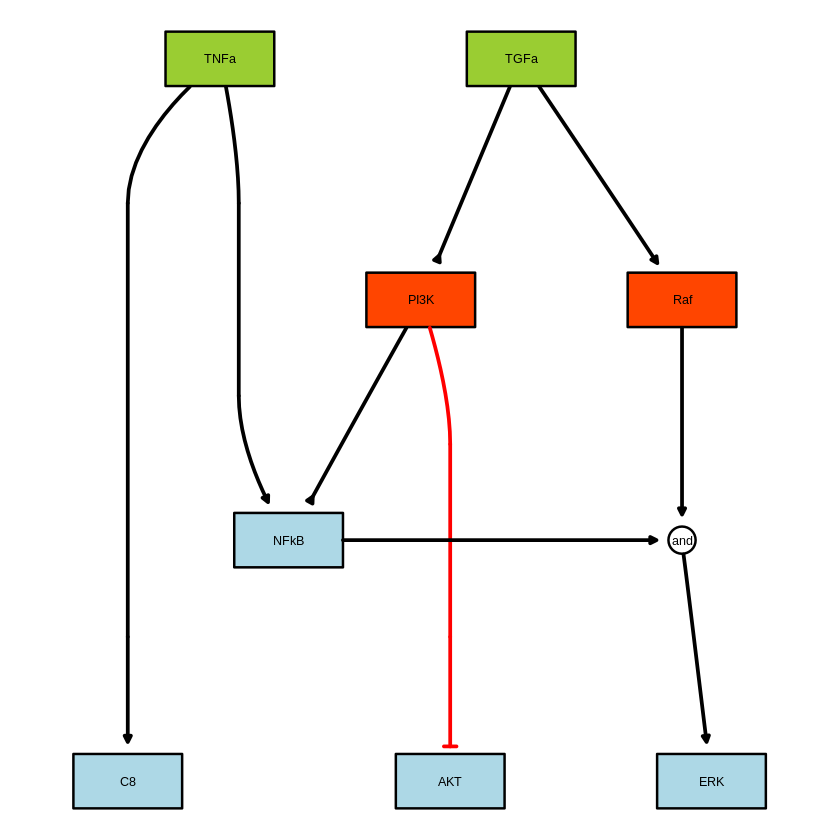

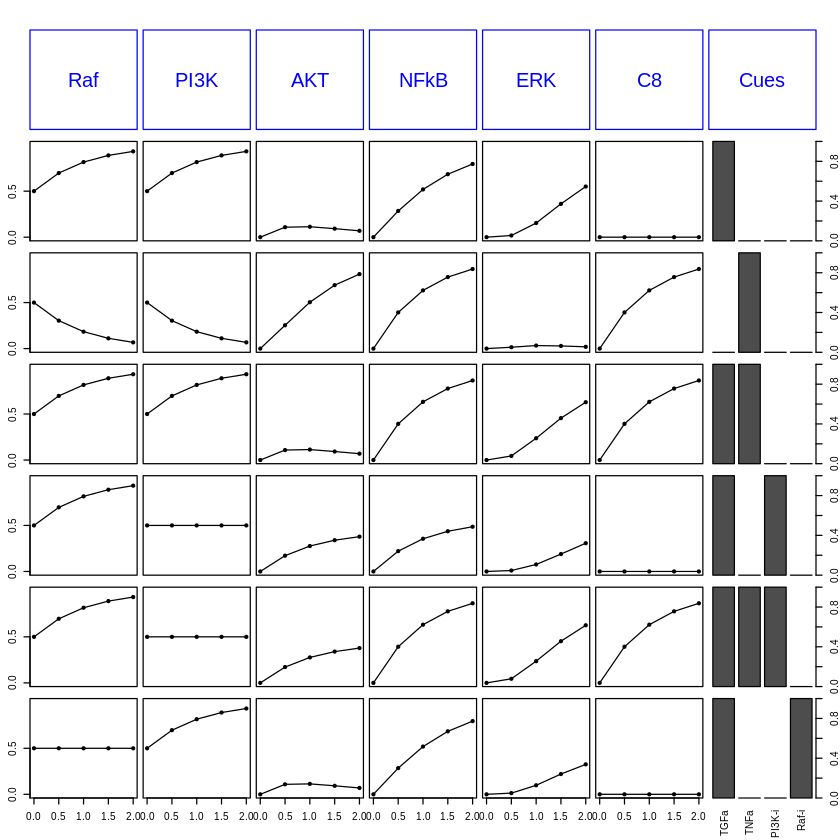

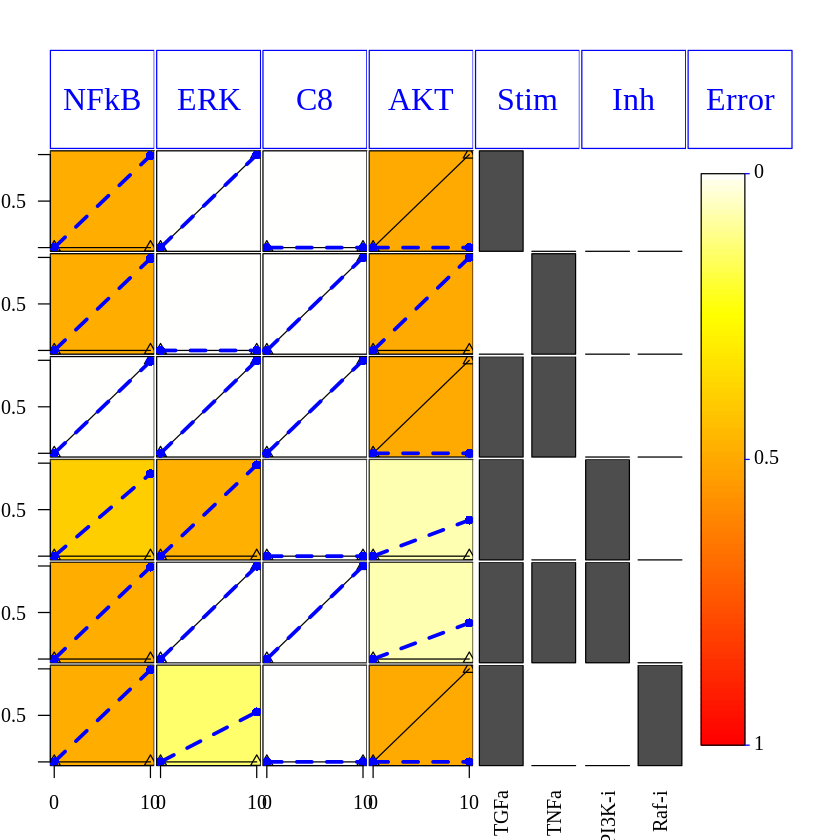

In [4]:
library(CNORode)
library(MEIGOR)

rawmodel=readSIF('PKN-test.sif');
cno_data=readMIDAS('MD-test.csv');
cnolist=makeCNOlist(cno_data,subfield=FALSE);
model=preprocessing(data=cnolist,rawmodel,cutNONC=T,compression=T,expansion=F)
plotModel(CNOlist=cnolist, model)

ode_parameters=createLBodeContPars(model, LB_n = 1, LB_k = 0.1,
                                   LB_tau = 0.01, UB_n = 5, UB_k = 0.9, UB_tau = 10, default_n = 3,
                                   default_k = 0.5, default_tau = 1, opt_n = TRUE, opt_k = TRUE,
                                   opt_tau = TRUE, random = FALSE)

modelSim=plotLBodeModelSim(cnolist = cnolist, model, ode_parameters,
                           timeSignals=seq(0,2,0.5));


initial_pars=createLBodeContPars(model, LB_n = 1, LB_k = 0.1,
                                 LB_tau = 0.01, UB_n = 5, UB_k = 0.9, UB_tau = 10, random = TRUE)
simulatedData=plotLBodeFitness(cnolist, model,initial_pars)


In [5]:
i <- 0
paste0("result", i, '.csv')

[1] "result0.csv"

In [6]:
requireNamespace("MEIGOR")
initial_pars=createLBodeContPars(model,
                                 LB_n = 1, LB_k = 0.1, LB_tau = 0.01, UB_n = 5,
                                 UB_k = 0.9, UB_tau = 10, random = TRUE)
tf <- 3
for (i in 1:30) {
  fit_result_ess =
    parEstimationLBodeSSm(cnolist = cnolist,
                          model = model,
                          ode_parameters = initial_pars,
                          maxeval = 1e5,
                          maxtime = 300,
                          local_solver = "DHC",
                          transfer_function = tf
    )
    df <- data.frame(elapsed_seconds = fit_result_ess$ssm_results$time, sse_loss = fit_result_ess$ssm_results$f)
    write.csv(df, file=paste0("result", i, ".csv"))
}



[1] "eSS R2014A - Enhanced Scatter Search"
[1] "eSS R2014A - Enhanced Scatter Search"

 ------------------------------------------------------------------------------ 
 essR - Enhanced Scatter Search in R 
<c> IIM-CSIC, Vigo, Spain -  email: gingproc@iim.csic.es 
------------------------------------------------------------------------------ 

Number of diverse solutions automatically calculated: 220 
Initial Pop: NFunEvals: 226 Bestf: 6.291243 CPUTime: 0.224 Mean: 8.447467 
Iteration: 1 NFunEvals: 517 Bestf: 4.662391 CPUTime: 0.593 Mean: 6.361125 
Call local solver: DHC 
Initial point function value: 4.662391 
Local solution function value: 2.562552 
Number of function evaluations in the local search: 2101 
CPU Time of the local search: 2.614 seconds 

Iteration: 2 NFunEvals: 2885 Bestf: 2.562552 CPUTime: 3.836 Mean: 5.161414 
Iteration: 3 NFunEvals: 3156 Bestf: 2.562552 CPUTime: 4.411 Mean: 4.147615 
Iteration: 4 NFunEvals: 3422 Bestf: 2.562552 CPUTime: 4.914 Mean: 3.692138 
Iteration

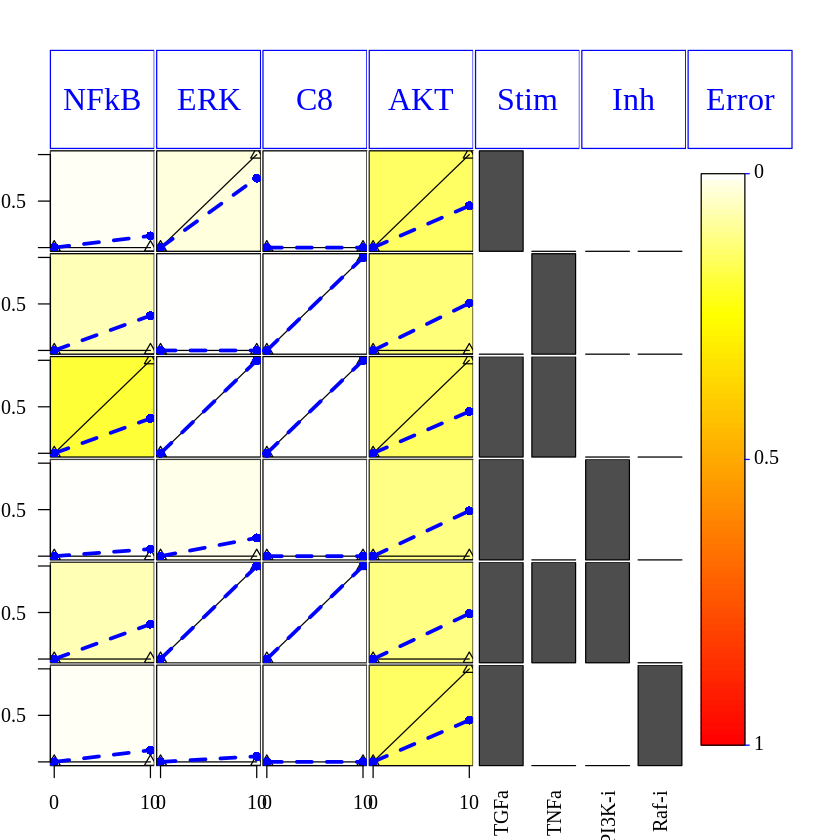

In [7]:
#Visualize fitted solution
simulatedData=plotLBodeFitness(cnolist, model,ode_parameters=fit_result_ess,transfer_function=tf)